# Figures for the paper

In [2]:
from scipy.integrate import quad
from numpy import *
from matplotlib.pylab import *
import matplotlib as mpl
%matplotlib inline

In [3]:
import PIL.Image as Image
import pickle

In [4]:
def plot_trace(data,t,ax=None,c='C0',band= None):
    if ax is None:
        ax = gca()
    vtracso = data*1.0
    vtracso.sort(axis=1)
    ax.plot(t,vtracso[:,250],c)
    if band == 0:
        pass
    elif band == 1:
        ax.fill_between(t,vtracso[:,79],vtracso[:,421],color=c,alpha=0.5)
    elif band ==2:
        ax.fill_between(t,vtracso[:,5],vtracso[:,495],color=c,alpha=0.2)
    else:
        ax.fill_between(t,vtracso[:,5],vtracso[:,495],color=c,alpha=0.2)
        ax.fill_between(t,vtracso[:,79],vtracso[:,421],color=c,alpha=0.5)
    return(ax)

In [5]:
from matplotlib.patches import ConnectionPatch

In [6]:
with open("../SpineModel/STDP_baseline.pickle","rb") as f:
    fweights,data,dcs = pickle.load(f)

In [7]:
tdels = [-100,-75,-50,-30,-20,-15,-10,-7.5,-5,-3.5,-2,-1,-0.5,0,0.5,1.0,2.0,2.75,3.5,5.0,7.5,10.0,15.0,20.,30.,50,75,100]

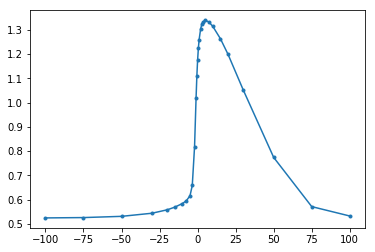

In [19]:
plot(tdels,data[:,4],'.-')
#fill_between(tdels,data[:,4]+data[:,4+3],data[:,4]+data[:,4-3])

In [24]:
for fk in fweights.keys():
    thks = list(fweights[fk].keys())
    break

In [38]:
def wdt(i,th1th2,corrected = True):
    a = [[fk,fweights[fk][th1th2][i]] for fk in fweights.keys()]
    a = array(a)
    if corrected:
        a[:,1] = a[:,1]-a[0,1]
    return(a)

Text(0.5, 1.0, '256')

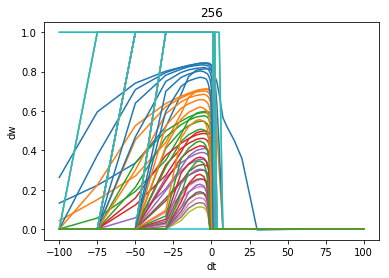

In [111]:
i = randint(500)
figure()
for ths in thks:
    wt = wdt(i,ths)
    plot(-wt[:,0],clip(wt[:,1],-1,1))
xlabel('dt')
ylabel('dw')
title(i)

Text(0, 0.5, 'dw')

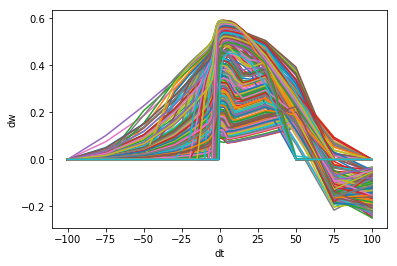

In [132]:
i = randint(500)
figure()
ths = (0.35,0.55)
for i in range(500):
    wt = wdt(i,ths)
    plot(wt[:,0],wt[:,1]/(wt[:,1]+.5))
xlabel('dt')
ylabel('dw')
